<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение модели</a></span></li><li><span><a href="#Расчет-прибыли" data-toc-modified-id="Расчет-прибыли-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчет прибыли</a><li><span><a href="#Расчет-рисков" data-toc-modified-id="Расчет-рисков-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Расчет рисков</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Описание проекта

**Контекст**. Нужно решить, где бурить новую скважину добывающей компании `«ГлавРосГосНефть»`.

Шаги для выбора локации обычно такие:
- в избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов;  
- строят модель для предсказания объёма запасов в новых скважинах;  
- выбирают скважины с самыми высокими оценками значений;  
- определяют регион с максимальной суммарной прибылью отобранных скважин.

**Цель**: построить модель для определения региона, где добыча принесёт наибольшую прибыль. Проанализировать возможную прибыль и риски техникой `Bootstrap`. 

**Условия задачи**:
* Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).  
* При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.  
* Бюджет на разработку скважин в регионе — 10 млрд рублей.  
* При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.  
* После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.  

### Описание данных
Даны три датасета, в которых предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны.

Данные о геологоразведки в трех регионах: 
**Признаки**  
* `id` — уникальный идентификатор скважины;
* `f0`, `f1`, `f2` — три признака точек (неважно, что они означают, но сами признаки значимы);

**Целевой признак**
* `product` — объём запасов в скважине (тыс. баррелей).

### План  
1) Изучу данные. Проведу преобработку данных.  
2) Обучу модель линейной регрессии (как уже дано в условиях задачи) и проверю модель для каждого региона.  
3) Напишу функцию для расчета прибыли по выбранным скважинам и предсказаниям модели.  
4) Посчитаю риски и прибыль для каждого региона с применением техники Bootstrap.  


In [1]:
# Имопрт библиотек 
import pandas as pd 
import numpy as np

# для графиков
import seaborn as sns
from matplotlib import pyplot as plt

# импорт моделей 
from sklearn.linear_model import LinearRegression 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

# импорт метрик оценки качества моделей
from sklearn.metrics import mean_squared_error

In [2]:
# два числа после запятой
pd.options.display.float_format = '{:,.2f}'.format

## Изучение данных из файла

In [3]:
# читаем данные
try:
    data_0 = pd.read_csv('/datasets/geo_data_0.csv')
    data_1 = pd.read_csv('/datasets/geo_data_1.csv')
    data_2 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    data_0 = pd.read_csv('geo_data_0.csv')
    data_1 = pd.read_csv('geo_data_1.csv')
    data_2 = pd.read_csv('geo_data_2.csv')

In [4]:
display(data_0.head())
print("\n")
display(data_0.info())

,id,f0,f1,f2,product
0,txEyH,0.71,-0.50,1.22,105.28
1,2acmU,1.33,-0.34,4.37,73.04
2,409Wp,1.02,0.15,1.42,85.27
3,iJLyR,-0.03,0.14,2.98,168.62
4,Xdl7t,1.99,0.16,4.75,154.04




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

In [5]:
display(data_1.head())
print("\n")
display(data_1.info())

,id,f0,f1,f2,product
0,kBEdx,-15.00,-8.28,-0.01,3.18
1,62mP7,14.27,-3.48,1.00,26.95
2,vyE1P,6.26,-5.95,5.00,134.77
3,KcrkZ,-13.08,-11.51,5.00,137.95
4,AHL4O,12.70,-8.15,5.00,134.77




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

In [6]:
display(data_2.head())
print("\n")
display(data_2.info())

,id,f0,f1,f2,product
0,fwXo0,-1.15,0.96,-0.83,27.76
1,WJtFt,0.26,0.27,-2.53,56.07
2,ovLUW,0.19,0.29,-5.59,62.87
3,q6cA6,2.24,-0.55,0.93,114.57
4,WPMUX,-0.52,1.72,5.90,149.60




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

In [7]:
print("Число дублей по 'id' в первом регионе:", data_0['id'].duplicated().sum())
print("Число дублей по 'id' во втором регионе:", data_1['id'].duplicated().sum())
print("Число дублей по 'id' в третьем регионе:", data_2['id'].duplicated().sum())

Число дублей по 'id' в первом регионе: 10
Число дублей по 'id' во втором регионе: 4
Число дублей по 'id' в третьем регионе: 4


**Краткие выводы**

Даны три датсета. В каждом датасете предоставлены пробы нефти по трем признакам и объемы запасов в каждой скважине. 

В датасетах есть дубли по `id` скважин. Можем ближе посмотреть на дубли.

In [8]:
data_0.loc[data_0['id'].duplicated()]

,id,f0,f1,f2,product
7530,HZww2,1.06,-0.37,10.43,158.83
41724,bxg6G,-0.82,0.55,3.63,93.01
51970,A5aEY,-0.18,0.94,-2.09,33.02
63593,QcMuo,0.64,-0.47,0.86,64.58
66136,74z30,1.08,-0.31,6.99,127.64
69163,AGS9W,-0.93,0.12,-3.66,19.23
75715,Tdehs,0.11,0.43,3.22,60.96
90815,fiKDv,0.05,0.84,6.39,137.35
92341,TtcGQ,0.11,1.02,0.91,101.32
97785,bsk9y,0.38,0.01,0.16,160.64


In [9]:
data_0.loc[data_0['id'] == 'HZww2']

,id,f0,f1,f2,product
931,HZww2,0.76,0.37,1.86,30.68
7530,HZww2,1.06,-0.37,10.43,158.83


In [10]:
data_0.loc[data_0['id'] == 'bxg6G']

,id,f0,f1,f2,product
1364,bxg6G,0.41,0.86,-3.65,73.60
41724,bxg6G,-0.82,0.55,3.63,93.01


In [11]:
data_0.loc[data_0['id'] == 'A5aEY']

,id,f0,f1,f2,product
3389,A5aEY,-0.04,0.16,0.21,89.25
51970,A5aEY,-0.18,0.94,-2.09,33.02


In [12]:
data_1.loc[data_1['id'].duplicated()]

,id,f0,f1,f2,product
41906,LHZR0,-8.99,-4.29,2.01,57.09
82178,bfPNe,-6.20,-4.82,3.00,84.04
82873,wt4Uk,10.26,-9.38,4.99,134.77
84461,5ltQ6,18.21,2.19,3.99,107.81


In [13]:
data_1.loc[data_1['id'] == "LHZR0"]

,id,f0,f1,f2,product
1305,LHZR0,11.17,-1.95,3.00,80.86
41906,LHZR0,-8.99,-4.29,2.01,57.09


In [14]:
data_1.loc[data_1['id'] == "wt4Uk"]

,id,f0,f1,f2,product
47591,wt4Uk,-9.09,-8.11,-0.00,3.18
82873,wt4Uk,10.26,-9.38,4.99,134.77


In [15]:
data_2.loc[data_2['id'].duplicated()]

,id,f0,f1,f2,product
43233,xCHr8,-0.85,2.10,5.60,184.39
49564,VF7Jo,-0.88,0.56,0.72,136.23
55967,KUPhW,1.21,3.18,5.54,132.83
95090,Vcm5J,2.59,1.99,2.48,92.33


In [16]:
data_2.loc[data_2['id'] == "xCHr8"]

,id,f0,f1,f2,product
28039,xCHr8,1.63,0.37,-2.38,6.12
43233,xCHr8,-0.85,2.10,5.60,184.39


In [17]:
###Код ревьюера
data_0.loc[data_0['id'].duplicated(keep=False)].sort_values('id')

,id,f0,f1,f2,product
66136,74z30,1.08,-0.31,6.99,127.64
64022,74z30,0.74,0.46,5.15,140.77
51970,A5aEY,-0.18,0.94,-2.09,33.02
3389,A5aEY,-0.04,0.16,0.21,89.25
69163,AGS9W,-0.93,0.12,-3.66,19.23
42529,AGS9W,1.45,-0.48,0.68,126.37
931,HZww2,0.76,0.37,1.86,30.68
7530,HZww2,1.06,-0.37,10.43,158.83
63593,QcMuo,0.64,-0.47,0.86,64.58
1949,QcMuo,0.51,-0.32,-2.22,75.50


**Краткие выводы**

В общем, какие-то странные дубли. Избавимся от дублей.

In [18]:
data_0 = data_0.drop_duplicates(subset=['id']).reset_index(drop=True)
data_1 = data_1.drop_duplicates(subset=['id']).reset_index(drop=True)
data_2 = data_2.drop_duplicates(subset=['id']).reset_index(drop=True)

In [19]:
print("Число дублей по 'id' в первом регионе:", data_0['id'].duplicated().sum())
print("Число дублей по 'id' во втором регионе:", data_1['id'].duplicated().sum())
print("Число дублей по 'id' в третьем регионе:", data_2['id'].duplicated().sum())

Число дублей по 'id' в первом регионе: 0
Число дублей по 'id' во втором регионе: 0
Число дублей по 'id' в третьем регионе: 0


<div class="alert alert-success">

**Комментарий ревьюера ✔️:**
    
Хорошо, что не забываешь проверять данные на дубликаты!

Избавились от дублей. 

Теперь рассмотрим распределения признаков и на корреляции между ними.  

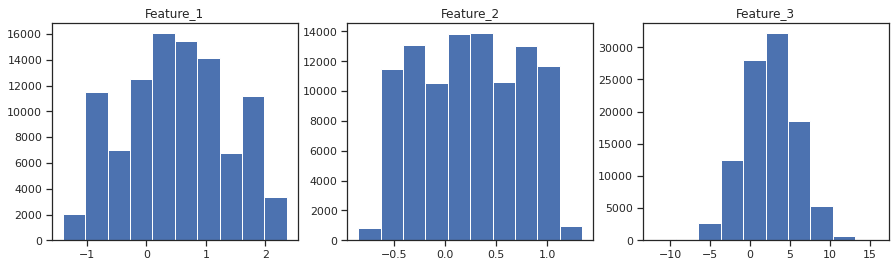

In [20]:
# посмотрим на распределения первого датасета

sns.set_theme(style="ticks")
fig, axes = plt.subplots(1, 3, figsize=(15,4))

axes[0].hist(x=data_0[['f0']])
axes[0].set_title('Feature_1')

axes[1].hist(x=data_0[['f1']]) 
axes[1].set_title('Feature_2')

axes[2].hist(x=data_0[['f2']]) 
axes[2].set_title('Feature_3')

plt.show()

**Краткий вывод**

Разный масштаб данных, нужно будет привезти к единому масштабу. Распределение третьего признака похоже на нормальное. Распределение первого признака напоминает нормальное, но в определенными аномальными значениями, а распределение третьего больше похоже на равномерное, если не учитывать крайня распределения.

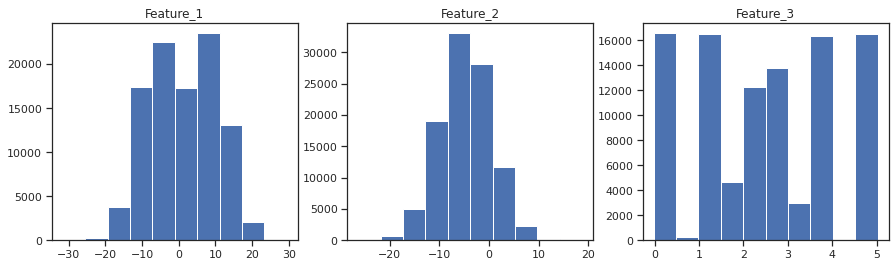

In [21]:
# посмотрим на распределения второго датасета

sns.set_theme(style="ticks")
fig, axes = plt.subplots(1, 3, figsize=(15,4))

axes[0].hist(x=data_1[['f0']])
axes[0].set_title('Feature_1')

axes[1].hist(x=data_1[['f1']]) 
axes[1].set_title('Feature_2')

axes[2].hist(x=data_1[['f2']]) 
axes[2].set_title('Feature_3')

plt.show()

**Краткий вывод**

Разный масштаб данных, который нужно будет приводить к единому. Распределение первого и второго признаков похожи на нормальное. 

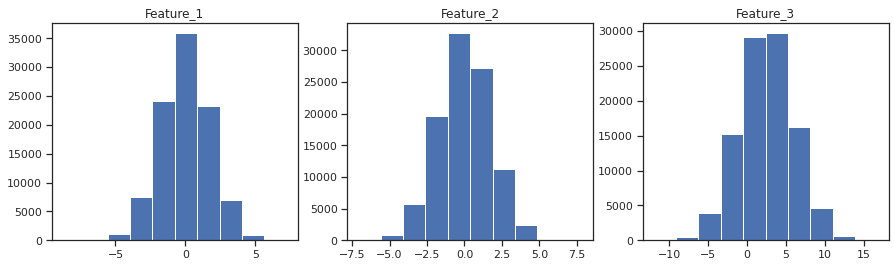

In [22]:
# посмотрим на распределения третьего датасета

sns.set_theme(style="ticks")
fig, axes = plt.subplots(1, 3, figsize=(15,4))

axes[0].hist(x=data_2[['f0']])
axes[0].set_title('Feature_1')

axes[1].hist(x=data_2[['f1']]) 
axes[1].set_title('Feature_2')

axes[2].hist(x=data_2[['f2']]) 
axes[2].set_title('Feature_3')

plt.show()

**Краткий вывод**

Распределения похожи на нормальные. Разный масштаб данных.

Рассмотрим **корреляции** между признаками.

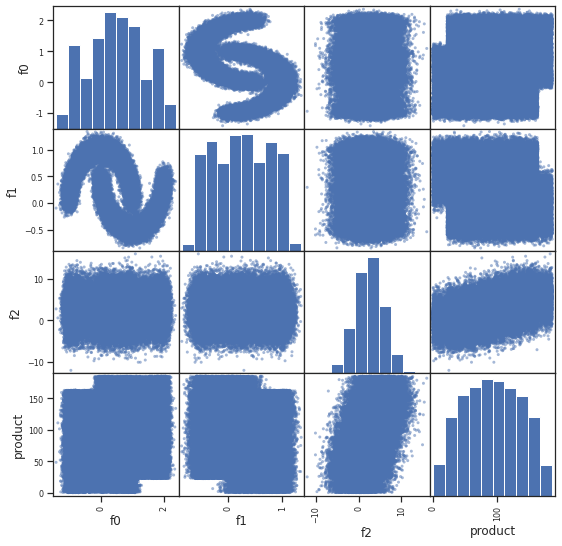

In [23]:
# матрица корреляций data_0
(
    pd.plotting
    .scatter_matrix(data_0.drop('id', axis=1), 
                    figsize=(9, 9))
);

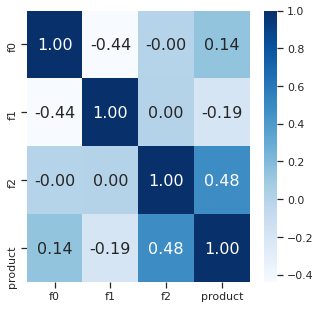

In [24]:
plt.figure(figsize=(5,5))
(
    sns.heatmap(data_0.drop('id', axis=1)
                .corr(), 
                annot=True, 
                cmap="Blues", 
                fmt='.2f', 
                annot_kws={'size':16})
);

**Краткие выводы**

Линейные корреляции между признаками практически отсутствуют. Может быть существует нелинейная связь между первым (`f0`) и вторым (`f1`) признаками. 
Наблюдается слабая связь между целевым признаком и третьим признаком (`f2`)

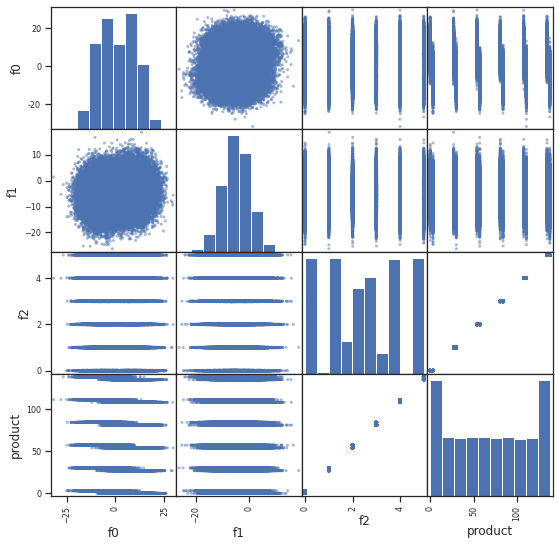

In [25]:
# матрица корреляций data_1
(
    pd.plotting
    .scatter_matrix(data_1.drop('id', axis=1), 
                    figsize=(9, 9))
);

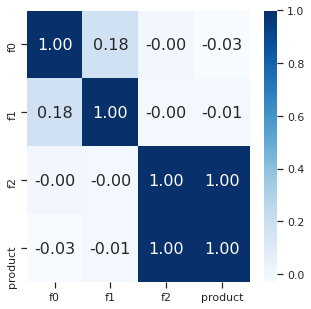

In [26]:
plt.figure(figsize=(5,5))
(
    sns.heatmap(data_1.drop('id', axis=1)
                .corr(), 
                annot=True, 
                cmap="Blues", 
                fmt='.2f', 
                annot_kws={'size':16})
);

**Краткий вывод**

Между признаками отсутствует линейная связь. Любопытно, что обнаружена сильная линейная положительная связь между третьим (`f2`) и целевым признаками.  

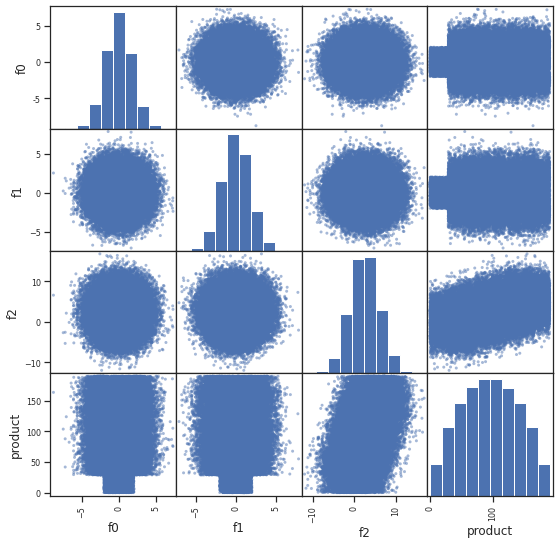

In [27]:
# матрица корреляций data_2
(
    pd.plotting
    .scatter_matrix(data_2.drop('id', axis=1), 
                    figsize=(9, 9))
);

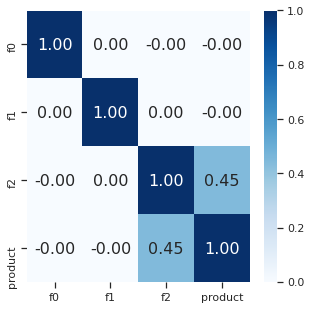

In [28]:
plt.figure(figsize=(5,5))
(
    sns.heatmap(data_2.drop('id', axis=1)
                .corr(), 
                annot=True, 
                cmap="Blues", 
                fmt='.2f', 
                annot_kws={'size':16})
);

**Краткий вывод**

Здесь, так же, как и выше, отсутсвуют линейные связи между признаками. Обнаржена слабая связь между третьим (`f2`) и целевым признаками. 

## Предобработка данных 

### Выбросы

Посмотрим на разброс в данных, чтобы понять есть ли сильные аномалии в данных и стоит ли избавиться от выбросов.

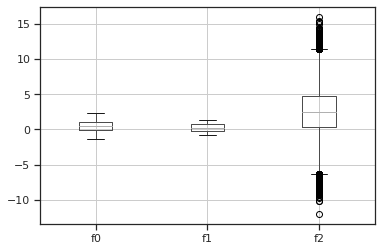

In [29]:
data_0.drop(['id', 'product'], axis=1).boxplot();

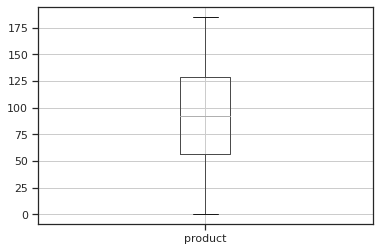

In [30]:
data_0[['product']].boxplot();

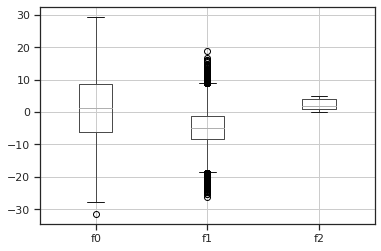

In [31]:
data_1.drop(['id', 'product'], axis=1).boxplot();

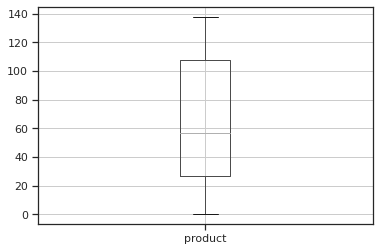

In [32]:
data_1[['product']].boxplot();

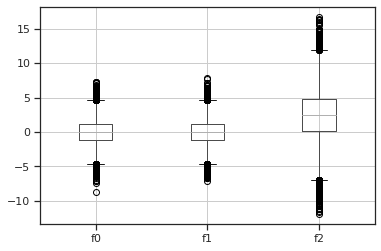

In [33]:
data_2.drop(['id', 'product'], axis=1).boxplot();

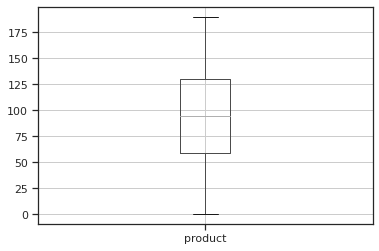

In [34]:
data_2[['product']].boxplot();

В данных присутствуют выбросы, однако нельзя сказать, что совсем аномальные. Удалять выбросы не будем. 

### Масштабирование данных

Итак, масштабируем наши переменные при помощи `StandardScaler`


Перед масштабированием разделим выборку на обучающую и валидационную в соотношении 75:25 (как указано в условии задания).




In [35]:
# разделим выборку на обучающую и валидационную data_0
target_0 = data_0['product']
features_0 = data_0.drop(['id', 'product'], axis=1)
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    features_0, target_0, test_size=0.25, random_state=12345)

In [36]:
# разделим выборку на обучающую и валидационную data_1
target_1 = data_1['product']
features_1 = data_1.drop(['id', 'product'], axis=1)
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features_1, target_1, test_size=0.25, random_state=12345)

In [37]:
# разделим выборку на обучающую и валидационную data_2
target_2 = data_2['product']
features_2 = data_2.drop(['id', 'product'], axis=1)
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features_2, target_2, test_size=0.25, random_state=12345)

In [38]:
# стандартизируем выборку data_0
scaler_0 = StandardScaler()
scaler_0.fit(features_train_0) 
features_train_0 = scaler_0.transform(features_train_0)

# преобразуем валидационную и тренировочную выборки
features_valid_0 = scaler_0.transform(features_valid_0)

In [39]:
# стандартизируем выборку data_1
scaler_1 = StandardScaler()
scaler_1.fit(features_train_1) 
features_train_1 = scaler_1.transform(features_train_1)

# преобразуем валидационную и тренировочную выборки
features_valid_1 = scaler_1.transform(features_valid_1)

In [40]:
# стандартизируем выборку data_2
scaler_2 = StandardScaler()
scaler_2.fit(features_train_2) 
features_train_2 = scaler_2.transform(features_train_2)

# преобразуем валидационную и тренировочную выборки
features_valid_2 = scaler_2.transform(features_valid_2)

Данные машстабированы. Перейдем к обучению модели. 


## Обучение модели

In [41]:
model = LinearRegression()

In [42]:
# обучение модели в первом регионе
model.fit(features_train_0, target_train_0)
predicted_valid_0 = model.predict(features_valid_0)
mse = mean_squared_error(target_valid_0, predicted_valid_0)

print('Средний запас предсказанного сырья:', predicted_valid_0.mean())
print("RMSE =", mse ** 0.5)

Средний запас предсказанного сырья: 92.78915638280621
RMSE = 37.853527328872964


In [43]:
# сохраним предсказанные по значения по валидационной выборке и целевые показатели в отдельный датасет
target_0 = pd.DataFrame(target_valid_0)
target_0['predicted_valid'] = model.predict(features_valid_0)

In [44]:
# обучение модели в первом регионе
model.fit(features_train_1, target_train_1)
predicted_valid_1 = model.predict(features_valid_1)
mse = mean_squared_error(target_valid_1, predicted_valid_1)

print('Средний запас предсказанного сырья:', predicted_valid_1.mean())
print("RMSE =", mse ** 0.5)

Средний запас предсказанного сырья: 69.1783195703043
RMSE = 0.8920592647717033


In [45]:
# сохраним предсказанные по значения по валидационной выборке и целевые показатели в отдельный датасет
target_1 = pd.DataFrame(target_valid_1)
target_1['predicted_valid'] = model.predict(features_valid_1)

In [46]:
# обучение модели в первом регионе
model.fit(features_train_2, target_train_2)
predicted_valid_2 = model.predict(features_valid_2)
mse = mean_squared_error(target_valid_2, predicted_valid_2)

print('Средний запас предсказанного сырья:', predicted_valid_2.mean())
print("RMSE =", mse ** 0.5)

Средний запас предсказанного сырья: 94.86572480562035
RMSE = 40.07585073246016


In [47]:
# сохраним предсказанные по значения по валидационной выборке и целевые показатели в отдельный датасет
target_2 = pd.DataFrame(target_valid_2)
target_2['predicted_valid'] = model.predict(features_valid_2)

In [48]:
target_0.head()

,product,predicted_valid
49466,123.57,103.95
55493,63.44,73.69
11689,88.72,101.02
13769,51.42,94.05
72389,102.57,87.56


In [49]:
target_1.head()

,product,predicted_valid
71747,53.91,53.41
80489,137.95,137.86
2655,30.13,29.75
71170,84.04,83.19
91137,0.00,1.24


In [50]:
target_2.head()

,product,predicted_valid
71747,97.65,76.46
80489,66.64,109.42
2655,57.78,89.92
71170,35.06,83.70
91137,82.05,86.76


**Краткие выводы**

Любопытно (не знаю, мб на практике это нормально), что модель с наименьшим RMSE получилась во втором регионе. Самый большой RMSE получен в третьем регионе.

По поводу среднего запаса предсказанного сырья, наибольшее значение получено в третьем регионе, затем в первом. Наименьший средний запас предсказанного сырья обнаружен во втором регионе. 

## Расчет прибыли

In [51]:
# сохраним ключевые значения для расчётов в отдельных переменных
revenue = 10**10
profit = 450 * 10**3
wells = 200

# найдем достаточный объём сырья для безубыточной разработки новой скважины
volume = revenue / (profit * wells)

print(f'Достаточный объём сырья для безубыточной разработки новой скважины равен {volume:.2f}')

Достаточный объём сырья для безубыточной разработки новой скважины равен 111.11


**Краткий вывод**

Итак, достаточный объем равен 111,11. 
Сравним этот показатель со средним значением по регионам. 

In [52]:
print(f'Средний объем сырья в скважинах первого региона равен {data_0["product"].mean():.2f}')
print(f'Средний объем сырья в скважинах второго региона равен {data_1["product"].mean():.2f}')
print(f'Средний объем сырья в скважинах третьего региона равен {data_2["product"].mean():.2f}')

Средний объем сырья в скважинах первого региона равен 92.50
Средний объем сырья в скважинах второго региона равен 68.82
Средний объем сырья в скважинах третьего региона равен 95.00


**Краткий вывод** 

Средний объем сырья в регионах меньше, чем достаточный объем сырья для безубыточной разработки новых скважин. 

Продолжим работу. 

Напишем **функцию** для расчёта прибыли по выбранным скважинам и предсказаниям модели. Согласно условию задачи функция должна выбирать скважины с максимальными значениями предсказаний, затем суммировать целевое значение объема сырья, соответствующего этим предсказаниям и возращать прибыль для полученного объема сырья.

In [53]:
def income_calculation(data, target, predicted, count): # на входе функция получает датасет и названия колонок с признаками
    top = data.sort_values(by=predicted, ascending=False)[:count].copy() # находим 200 точек с наибольшими предсказанными запасами сырья
    volume = top[target].sum() # суммируем целевое значение объема сырья, соответствующего предсказаниям
    income = volume * profit # рассчитываем прибыль
    return income

In [54]:
(
    print('Прибыль для полученного объема сырья в первом регионе равна',
        income_calculation(data=target_0, target='product', predicted='predicted_valid', count=200))
)

Прибыль для полученного объема сырья в первом регионе равна 13365187237.700287


In [55]:
(
    print('Прибыль для полученного объема сырья в третьем регионе равна',
        income_calculation(data=target_1, target='product', predicted='predicted_valid', count=200))
)

Прибыль для полученного объема сырья в третьем регионе равна 12415086696.68151


In [56]:
(
    print('Прибыль для полученного объема сырья в третьем регионе равна',
        income_calculation(data=target_2, target='product', predicted='predicted_valid', count=200))
)

Прибыль для полученного объема сырья в третьем регионе равна 12501283853.282063


**Краткий вывод**

Пока по полученным данным можно делать вывод, что выгоднее всего бурлить скважины в перво регионе. Хотя во всех трех регионах прибыльно пробурлить скважины. 

Теперь оценим риски и прибыль для каждого региона при помощи Bootstrap.

## Расчет рисков

Посчитайте риски и прибыль для каждого региона:

In [57]:
state = np.random.RandomState(12345)

In [58]:
# найдем среднюю прибыль для первого региона
values = []
for i in range(1000):
    subsample = target_0.sample(n=500, replace=True, random_state=state)
    values.append(income_calculation(subsample, 'product', 'predicted_valid', 200))
    
values = pd.Series(values) # получили распределение прибыли с 1000 выборок
mean = values.mean() # средняя прибыль с 1000 выборок
print("Средняя прибыль с 1000 выборок в первом регионе:", mean)

Средняя прибыль с 1000 выборок в первом регионе: 10380613470.017597


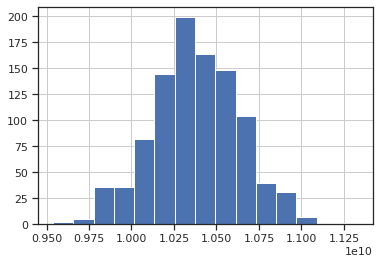

In [59]:
# построим гистограмму распределения прибыли с 1000 выборок
values.hist(bins=15);

Получилось распределение похожее на нормальное. 

Найдем 95%-процентый интервал для средней прибыли.

In [60]:
lower = values.quantile(0.025) 
upper = values.quantile(0.975) 

print(f'Доверительный интервал в первом регионе ({lower:.2f}, {upper:.2f})')

Доверительный интервал в первом регионе (9857057260.26, 10890976833.85)


In [61]:
# найдем риск убытка для первого региона
# для этого найдем отношение количества убыточных выборок ко всей тысяче
loss_0 = values[values<=10**10].shape[0] / values.shape[0]
print(f'Вероятность убыток в первом регионе равна {loss_0}')

Вероятность убыток в первом регионе равна 0.077


**Краткий вывод**

Итак, вероятность убыток в первом регионе равна ~0.187~ 0.077. 

Теперь найдем распределения средней прибыли с 1000 выборок, среднюю прибыль, 95%-процентный интервал и оценим риск убыток в двух остальных регионах. 

In [62]:
# найдем среднюю прибыль для второго региона
values = []
for i in range(1000):
    subsample = target_1.sample(n=500, replace=True, random_state=state)
    values.append(income_calculation(subsample, 'product', 'predicted_valid', 200))

values = pd.Series(values)
mean = values.mean()
print("Средняя прибыль с 1000 выборок во втором регионе:", mean)

# 95% доверительный интервал
lower = values.quantile(0.025) 
upper = values.quantile(0.975) 

print(f'Доверительный интервал во втором регионе ({lower:.2f}, {upper:.2f})')

Средняя прибыль с 1000 выборок во втором регионе: 10479159869.981588
Доверительный интервал во втором регионе (10073849212.02, 10917953817.72)


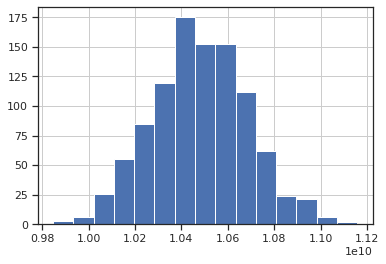

In [63]:
# построим гистограмму распределения прибыли с 1000 выборок
values.hist(bins=15);

In [64]:
# найдем риск убытка 
loss_1 = values[values<=10**10].shape[0] / values.shape[0]
print(f'Вероятность убыток во втором регионе равна {loss_1}')

Вероятность убыток во втором регионе равна 0.006


**Краткий вывод**

Во втором регионе очень малая вероятность убытков. 

In [65]:
# найдем среднюю прибыль для третьего региона
values = []
for i in range(1000):
    subsample = target_2.sample(n=500, replace=True, random_state=state)
    values.append(income_calculation(subsample, 'product', 'predicted_valid', 200))

values = pd.Series(values)
mean = values.mean()
print("Средняя прибыль с 1000 выборок в третьем регионе:", mean)

# 95% доверительный интервал
lower = values.quantile(0.025) 
upper = values.quantile(0.975) 

print(f'Доверительный интервал в третьем регионе ({lower:.2f}, {upper:.2f})')

Средняя прибыль с 1000 выборок в третьем регионе: 10315441916.02349
Доверительный интервал в третьем регионе (9783734949.97, 10811060708.24)


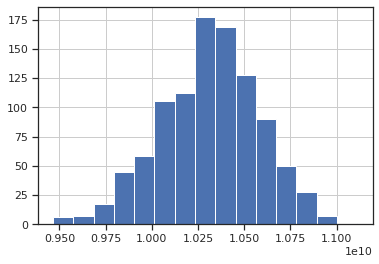

In [66]:
# построим гистограмму распределения прибыли с 1000 выборок
values.hist(bins=15);

In [67]:
# найдем риск убытка 
loss_2 = values[values<=10**10].shape[0] / values.shape[0]
print(f'Вероятность убыток во третьем регионе равна {loss_2}')

Вероятность убыток во третьем регионе равна 0.124


**Краткий вывод** Риск убыток в третьем регионе составляет всего ~1%~ 12%. 

## Общий вывод

Проведя анализ, кажется разумным проводить работы по бурлению скважин во **втором** регионе. Здесь средняя прибыль с 200 скважин с самым большим предсказанным запасом сырья выше $10^{10}$ руб. и выше в остальных регионах, и нижний конец доверительного интервала для средней прибыли с 1000 выборок выше 10 млрд. руб. Риск убыток составляет лишь `0,6%`, что меньше двух других регионах. 

### Дополнительно

##  Масштабирование с помощью RobustScaler

In [68]:
from sklearn.preprocessing import RobustScaler

In [69]:
# разделим выборку на обучающую и валидационную data_0
target_0 = data_0['product']
features_0 = data_0.drop(['id', 'product'], axis=1)
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    features_0, target_0, test_size=0.25, random_state=12345)

In [70]:
# разделим выборку на обучающую и валидационную data_1
target_1 = data_1['product']
features_1 = data_1.drop(['id', 'product'], axis=1)
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features_1, target_1, test_size=0.25, random_state=12345)

In [71]:
# разделим выборку на обучающую и валидационную data_2
target_2 = data_2['product']
features_2 = data_2.drop(['id', 'product'], axis=1)
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features_2, target_2, test_size=0.25, random_state=12345)

In [72]:
# стандартизируем выборку data_0
scaler_0 = RobustScaler()
scaler_0.fit(features_train_0) 
features_train_0 = scaler_0.transform(features_train_0)

# преобразуем валидационную и тренировочную выборки
features_valid_0 = scaler_0.transform(features_valid_0)

In [73]:
# стандартизируем выборку data_1
scaler_1 = RobustScaler()
scaler_1.fit(features_train_1) 
features_train_1 = scaler_1.transform(features_train_1)

# преобразуем валидационную и тренировочную выборки
features_valid_1 = scaler_1.transform(features_valid_1)

In [74]:
# стандартизируем выборку data_2
scaler_2 = RobustScaler()
scaler_2.fit(features_train_2) 
features_train_2 = scaler_2.transform(features_train_2)

# преобразуем валидационную и тренировочную выборки
features_valid_2 = scaler_2.transform(features_valid_2)

### Обучение модели

In [75]:
model = LinearRegression()

In [76]:
# обучение модели в первом регионе
model.fit(features_train_0, target_train_0)
predicted_valid_0 = model.predict(features_valid_0)
mse = mean_squared_error(target_valid_0, predicted_valid_0)

print('Средний запас предсказанного сырья:', predicted_valid_0.mean())
print("RMSE =", mse ** 0.5)

Средний запас предсказанного сырья: 92.78915638280621
RMSE = 37.853527328872964


In [77]:
# обучение модели в первом регионе
model.fit(features_train_1, target_train_1)
predicted_valid_1 = model.predict(features_valid_1)
mse = mean_squared_error(target_valid_1, predicted_valid_1)

print('Средний запас предсказанного сырья:', predicted_valid_1.mean())
print("RMSE =", mse ** 0.5)

Средний запас предсказанного сырья: 69.1783195703043
RMSE = 0.8920592647717033


In [78]:
# обучение модели в первом регионе
model.fit(features_train_2, target_train_2)
predicted_valid_2 = model.predict(features_valid_2)
mse = mean_squared_error(target_valid_2, predicted_valid_2)

print('Средний запас предсказанного сырья:', predicted_valid_2.mean())
print("RMSE =", mse ** 0.5)

Средний запас предсказанного сырья: 94.86572480562035
RMSE = 40.07585073246016


На качестве модели применение другого метода шкалирования не отразилось. Вероятнее всего это отразится на коэффициентах регрессии. 

Feature: 0, Score: 0.12062
Feature: 1, Score: -0.14458
Feature: 2, Score: 27.15400


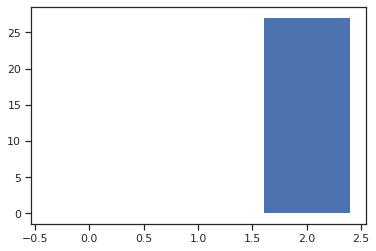

In [79]:
# для последнего региона
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Без масштабирования

In [80]:
# разделим выборку на обучающую и валидационную data_0
target_0 = data_0['product']
features_0 = data_0.drop(['id', 'product'], axis=1)
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    features_0, target_0, test_size=0.25, random_state=12345)

In [81]:
# разделим выборку на обучающую и валидационную data_1
target_1 = data_1['product']
features_1 = data_1.drop(['id', 'product'], axis=1)
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features_1, target_1, test_size=0.25, random_state=12345)

In [82]:
# разделим выборку на обучающую и валидационную data_2
target_2 = data_2['product']
features_2 = data_2.drop(['id', 'product'], axis=1)
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features_2, target_2, test_size=0.25, random_state=12345)

In [83]:
model = LinearRegression()

In [84]:
# обучение модели в первом регионе
model.fit(features_train_0, target_train_0)
predicted_valid_0 = model.predict(features_valid_0)
mse = mean_squared_error(target_valid_0, predicted_valid_0)

print('Средний запас предсказанного сырья:', predicted_valid_0.mean())
print("RMSE =", mse ** 0.5)

Средний запас предсказанного сырья: 92.78915638280621
RMSE = 37.853527328872964


In [85]:
# обучение модели в первом регионе
model.fit(features_train_1, target_train_1)
predicted_valid_1 = model.predict(features_valid_1)
mse = mean_squared_error(target_valid_1, predicted_valid_1)

print('Средний запас предсказанного сырья:', predicted_valid_1.mean())
print("RMSE =", mse ** 0.5)

Средний запас предсказанного сырья: 69.17831957030432
RMSE = 0.892059264771703


In [86]:
# обучение модели в первом регионе
model.fit(features_train_2, target_train_2)
predicted_valid_2 = model.predict(features_valid_2)
mse = mean_squared_error(target_valid_2, predicted_valid_2)

print('Средний запас предсказанного сырья:', predicted_valid_2.mean())
print("RMSE =", mse ** 0.5)

Средний запас предсказанного сырья: 94.86572480562035
RMSE = 40.07585073246016


Feature: 0, Score: 0.05210
Feature: 1, Score: -0.06164
Feature: 2, Score: 5.77203


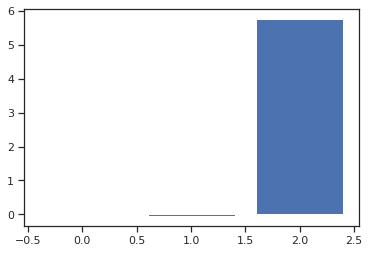

In [87]:
# для последнего региона
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Проведение масштабирование другим способом отражается на величине коэффициентов, но не отражается на показателях метрик.
